# Getting the distributions of the Rods and cone cells

Im not really sure how to do this.  really have to think about how i want to show the fovea vs the cone and rod cells.

one get the size of the input image. 

how to approximate the size of the foevea?

In [18]:
from PIL import Image
import numpy as np
import colorsys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math




1. get the shape of the images
2. calculate how much is 0.5% of the total number of pixels
3. get all the factors of the number of the 0.5% pixels
4. get the middle two factors
5. find half the length and half the width of the shape file, that will be the starting pixel.
6. then find half the width and half the length of the fovea thats the length that you add on and subtract in the starting pixel
7. create a filter and find the appropriate pixels for the fovea.
8. each pixel with have a number 1, 2 3 4. each number corresponds to a type of cell. 

<h1>Distribution of numbers of each type of cell</h1>


The distribution of photoreceptor cells in the human retina varies across different regions and includes a mix of S-cones, M-cones, L-cones, and rod cells. 
Here's an overview of their distribution:

Overall numbers:

- Rods: There are approximately 92-120 million rod cells in the human retina.
- Cones: The human retina contains about 6-7 million cone cells in total.

Fovea:

- L-cones and M-cones are most concentrated in the fovea tightly packed
- S-cones are absent from the center of the human fovea.
- Rod cells are absent from the fovea.

Distribution of cone types:

- L-cones (sensitive to long wavelengths) and M-cones (sensitive to medium wavelengths) are the most numerous, with L-cones typically outnumbering M-cones.
- The ratio of L-cones to M-cones varies among individuals, with some studies showing ratios like 75.8% L-cones to 20.0% M-cones, or 50.6% L-cones to 44.2% M-cones.
- S-cones (sensitive to short wavelengths) make up only about 5-10% of the total cone population and are more peripherally located in the retina.

Peripheral retina:

- Rod cells dominate the peripheral retina, where they are more numerous than cones.
- Cones become less densely packed towards the periphery of the retina.

It's important to note that the exact distribution and ratios of photoreceptor cells can vary among individuals. The retinal mosaic, which refers to the overall distribution of rods and cones, is designed to optimize visual function in different lighting conditions and for various visual tasks.

ref plain old wikipedia:  https://en.wikipedia.org/wiki/Cone_cell


## 1 to 4


In [27]:
from image_class import ImageConverter


# Example usage
converter = ImageConverter("text_image_1.jpg")

total_pixels = converter.image.size[0] * converter.image.size[1] 
fovea_pixls = total_pixels * 0.005


def round_to_even(number):
    rounded = round(number)
    # Check if rounded number is odd
    if rounded % 2 != 0:
        # If the original number is greater than the rounded number, round up to the next even number
        if number > rounded:
            return rounded + 1
        # If the original number is less than the rounded number, round down to the previous even number
        else:
            return rounded - 1
    return rounded

fovea_pixls = round_to_even(fovea_pixls)

In [28]:
print(total_pixels)
print(fovea_pixls)

1049088
5246


In [31]:


def find_factors(n):
    factors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            factors.add(i)
            factors.add(n // i)
    return sorted(factors)



In [32]:
def middle_two_factors(n):
    factors = find_factors(n)
    length = len(factors)
    
    if length % 2 == 0:
        middle_index = length // 2
        return factors[middle_index - 1], factors[middle_index]
    else:
        # For numbers with an odd number of factors, return the middle one repeated
        middle_index = length // 2
        return factors[middle_index], factors[middle_index]

In [34]:
# Example usage
number = 5244
middle_factors = middle_two_factors(number)
print(middle_factors) 

(69, 76)


# 5. get the starting pixel of the fovea


In [50]:

 length= converter.image.size[0] 
 width= converter.image.size[1] 
fovea_width = middle_factors[0]
fovea_length = middle_factors[1]


In [51]:
print(width)
print(length)
print(fovea_length)
print(fovea_width)

768
1366
76
69


In [52]:
def calculate_fovea_corner(width_retina, height_retina, width_fovea, height_fovea):
    x_start = (width_retina - width_fovea) // 2
    y_start = (height_retina - height_fovea) // 2
    return x_start, y_start


fovea_corner = calculate_fovea_corner(width, length, fovea_width, fovea_length)
print(f"The fovea starts at pixel: {fovea_corner}")

The fovea starts at pixel: (349, 645)


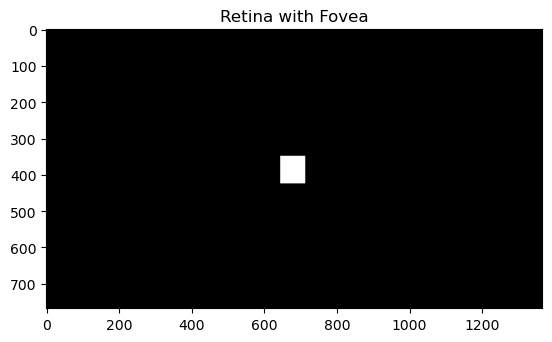

In [57]:

def create_retina_with_fovea(width, length, fovea_width, fovea_length):
    # Create a retina grid filled with zeros
    retina = np.zeros((width,length))
    
    # Calculate the starting position of the fovea
    y_start= (width - fovea_width) // 2
    x_start= (length - fovea_length) // 2
    
    # Fill the fovea area with ones
    retina[y_start:y_start + fovea_length, x_start:x_start + fovea_width] = 1
    
    return retina


# Create the retina grid with fovea
retina = create_retina_with_fovea(width,length,fovea_width , fovea_length)

# Plot the result using matplotlib
plt.imshow(retina, cmap='gray')
plt.title("Retina with Fovea")
plt.show()

### add the filters


In [79]:
def create_fovea_filters(width_fovea, height_fovea):
    # Example distribution of cone cells and rod cells (percentages)
    red_cones = 0.30  # percentage
    green_cones = 0.50  # percentage
    blue_cones = 0.10  # percentage
    rod = 0.10  # percentage
    
    # Total number of pixels in the fovea
    total_pixels = width_fovea * height_fovea

    # Calculate number of cells based on percentages
    red_cells = int(red_cones * total_pixels)
    
    green_cells = int(green_cones  * total_pixels)

    blue_cells = int(blue_cones * total_pixels)
    rod_cells = int(rod * total_pixels)
    
    # Create an array to hold the filters (values 1, 2, 3, 4)
    filters = np.zeros((height_fovea, width_fovea))
    
    filters[:red_cells] = 1
    filters[red_cells:red_cells + green_cells] = 2
    filters[red_cells + green_cells:red_cells + green_cells + blue_cells] = 3
    filters[red_cells + green_cells + blue_cells:red_cells + green_cells + blue_cells + rod_cells] = 4

    
    # Shuffle the array to randomize the distribution
    np.random.shuffle(filters)
    
    return filters

# Example dimensions of the fovea grid
width_fovea = 20
height_fovea = 20

# Create the fovea filters
fovea_filters = create_fovea_filters(width_fovea, height_fovea)
print(fovea_filters)
# # Plot the filters using matplotlib
# plt.imshow(fovea_filters, cmap='viridis', vmin=1, vmax=4, interpolation='nearest')
# plt.colorbar(ticks=[1, 2, 3, 4])
# plt.title("Fovea Filters")
# plt.show()


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

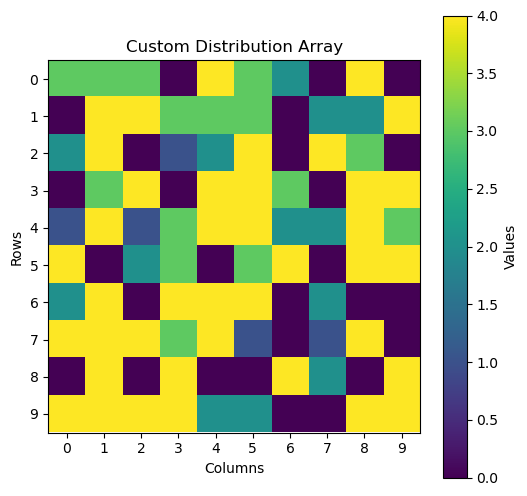

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def create_custom_distribution_array(n, m, distributions):
    total_elements = n * m
    array = np.zeros((n, m), dtype=int)

    for value, percentage in distributions.items():
        num_elements = int(total_elements * percentage)
        indices = np.random.choice(total_elements, num_elements, replace=False)
        row_indices, col_indices = np.unravel_index(indices, array.shape)
        array[row_indices, col_indices] = value

    return array

# Example distributions (change percentages and values as needed)
distributions = {
    1: 0.1,   # 10% of elements will be 1
    2: 0.3,   # 30% of elements will be 2
    3: 0.2,   # 20% of elements will be 3
    4: 0.4    # 40% of elements will be 4
}

# Example dimensions
n = 10   # Number of rows
m = 10   # Number of columns

# Create the array with custom distributions
custom_array = create_custom_distribution_array(n, m, distributions)

# Display the array as a heatmap
plt.figure(figsize=(6, 6))
plt.imshow(custom_array, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.title('Custom Distribution Array')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(np.arange(m))
plt.yticks(np.arange(n))
plt.grid(visible=False)
plt.show()
